# Vou analisar a relação entre Inflação e Juros nos EUA: 

In [5]:
#Vamos fazer uma regressão simples com juros e inflação nos EUA.
import quandl   #Estaremos pegando os dados do Quandl.
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm 
from scipy import stats
import numpy as np

In [6]:
#Pegando os dados no quandl:
dado_fedfunds = quandl.get('FRED/FEDFUNDS',start_date='1960-01-01')
dado_infla = quandl.get('RATEINF/INFLATION_USA',start_date='1960-01-01')

# Gráfico Scatter:

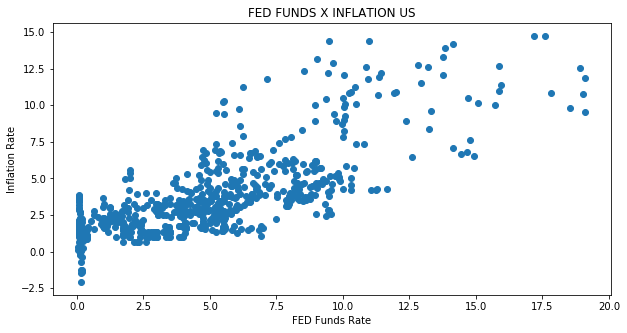

In [21]:
#Vamos plotar esses dados e ver como é a relação entre eles:
plt.figure(figsize=(10,5))
plt.scatter(dado_fedfunds,dado_infla)
plt.ylabel('Inflation Rate')
plt.xlabel('FED Funds Rate')
plt.title('FED FUNDS X INFLATION US')
plt.show()

# Gráfico de Linha:

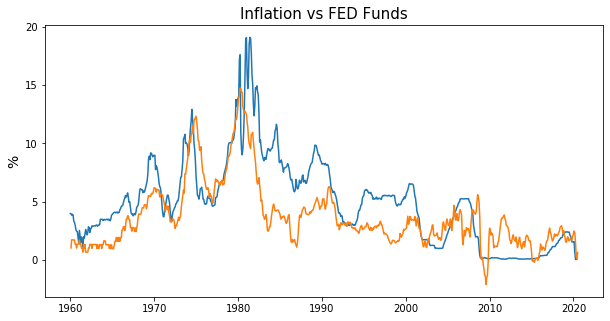

In [19]:
plt.figure(figsize=(10,5))
plt.plot(dado_fedfunds,label='FED Funds')
plt.plot(dado_infla,label='Inflation')
plt.title('Inflation vs FED Funds',fontsize=15)
plt.ylabel('%',fontsize=14)
plt.show()


In [8]:
#Criamos um data frame para botar estes dados, pois são de datas diferentes:
indicadores_econ = pd.DataFrame({'FED Funds Rate':np.array(dado_fedfunds.Value),'Inflation Rate':np.array(dado_infla.Value)})

#Fazemos uma regressão simples com método OLS(Ordinary Least Squares)
X = indicadores_econ['FED Funds Rate']
Y = indicadores_econ['Inflation Rate']
X1 = sm.add_constant(X)
reg = sm.OLS(Y,X1).fit()
reg.summary()

C:\Users\pedro\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Inflation Rate   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     1012.
Date:                Wed, 29 Jul 2020   Prob (F-statistic):          1.26e-139
Time:                        18:07:56   Log-Likelihood:                -1468.4
No. Observations:                 726   AIC:                             2941.
Df Residuals:                     724   BIC:                             2950.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.7813      0.114      6.839      0.000       0.557       1.006
FED Funds Rate     0.5891      0.019     31.811      0.000       0.553       0.625
==============================================================================
Omnibus:                      134.460   Durbin-Watson:                   0.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.949
Skew:                           1.076   Prob(JB):                     4.35e-56
Kurtosis:                       4.949   Cond. No.                         10.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Plotando a regressão:

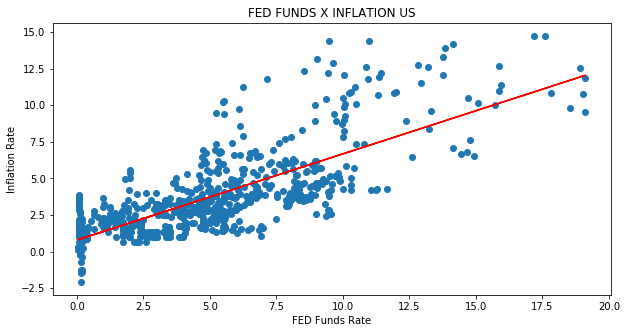

In [20]:
#Agora plotamos o gráfico com a regressão:
plt.figure(figsize=(10,5))
plt.scatter(dado_fedfunds,dado_infla)
plt.ylabel('Inflation Rate')
plt.xlabel('FED Funds Rate')
plt.plot(X,stats.linregress(X,Y).slope*X+stats.linregress(X,Y).intercept,color='Red')
plt.title('FED FUNDS X INFLATION US')
plt.show()